# Supervised Learning Regression

## Linear Regression

### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
n = 100
x = np.linspace(10,100,n)
e = np.random.normal(0, 30, x.shape[0])
y = 3 * x + e

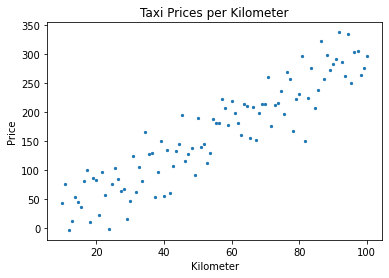

In [3]:
# make the plot
plt.scatter(x,y, s=5)
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilometer')
plt.show()

### Fitting

In [4]:
m_array = np.linspace(2,4,50)

cost_list = []
for m in m_array:
    squared_residuals = (x * m - y)**2
    sum_of_squared_residuals = np.sum(squared_residuals, axis=0)
    cost = 1 / n * sum_of_squared_residuals
    cost_list.append(cost)

# find minimal cost index
index = np.argmin(cost_list)
# save the m with the lowest cost
m_best = m_array[index]

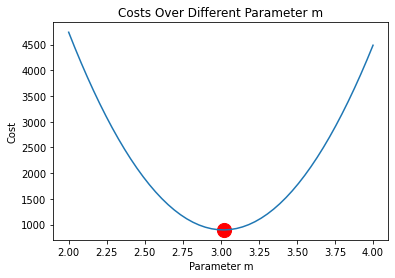

In [5]:
# Plot Cost over m's
plt.plot(m_array, cost_list)
# Plot minimal cost as a red dot
plt.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
# axis naming
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')
plt.show()

In [6]:
# predict value with linear regression
y_prediction = x * m_best

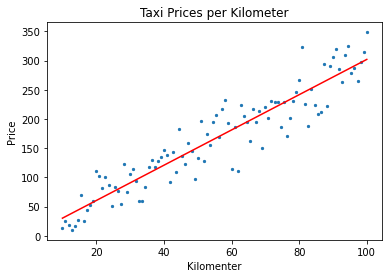

In [7]:
# make the plot
plt.scatter(x,y, s=5)
# plot the model
plt.plot(x,y_prediction, c='red')
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
plt.show()

### Model Selection

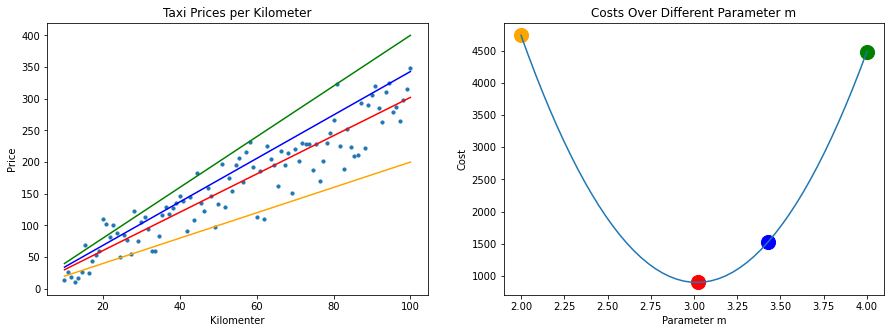

In [8]:
fig = plt.figure(figsize=(15,5)) 
ax = fig.add_subplot(121) 
ax.plot(x,x*m_best, c='red')
ax.plot(x,m_array[0]*x,c='orange')
ax.plot(x,m_array[-1]*x,c='green')
ax.plot(x,m_array[-15]*x,c='blue')
ax.scatter(x,y, s=10)
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
ax = fig.add_subplot(122)
ax.plot(m_array, cost_list)
ax.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
ax.scatter(m_array[0], cost_list[0],marker='o', c='orange', s=200)
ax.scatter(m_array[-1], cost_list[-1],marker='o', c='green', s=200)
ax.scatter(m_array[-15], cost_list[-15],marker='o', c='blue', s=200)
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')
plt.show()

### Model Selection, Random Subset of the Data

In [9]:
m_array = np.linspace(2,4,50)
m_best_list = []
for i in range(20):
    np.random.seed(i)
    x_sub = np.random.choice(x, 20, replace=True)
    np.random.seed(i)
    y_sub = np.random.choice(y, 20, replace=True)
    cost_list = []
    for m in m_array:
        cost = 1 / n * np.sum((x_sub * m - y_sub)**2, axis=0)
        cost_list.append(cost)

    # find minimal cost index
    index = np.argmin(cost_list)
    # save the m with the lowest cost
    m_best = m_array[index]
    m_best_list.append(m_best)

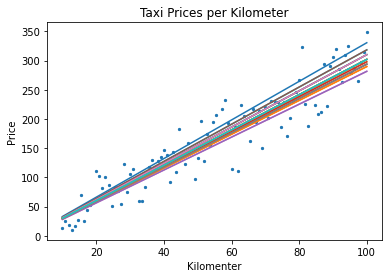

In [10]:
plt.scatter(x,y, s=5)
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
for m in m_best_list: 
    y_prediction = x * m
    plt.plot(x,y_prediction)
plt.show()